In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# Load the data into a DataFrame
data = pd.read_csv(r"C:\Users\Rahi\Downloads\Crop Production data.csv")

In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  


In [4]:
# Summary of the dataset
print("\nSummary of the dataset:")
print(data.info())



Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB
None


In [5]:
# Statistical summary of numerical columns
print("\nStatistical summary of numerical columns:")
print(data.describe())



Statistical summary of numerical columns:
           Crop_Year          Area    Production
count  246091.000000  2.460910e+05  2.423610e+05
mean     2005.643018  1.200282e+04  5.825034e+05
std         4.952164  5.052340e+04  1.706581e+07
min      1997.000000  4.000000e-02  0.000000e+00
25%      2002.000000  8.000000e+01  8.800000e+01
50%      2006.000000  5.820000e+02  7.290000e+02
75%      2010.000000  4.392000e+03  7.023000e+03
max      2015.000000  8.580100e+06  1.250800e+09


In [4]:
# Check for missing values
print("\nMissing values in the dataset:")
print(data.isnull().sum())



Missing values in the dataset:
State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


In [5]:
# Impute missing values in the 'Production' column with the mean value
data['Production'].fillna(data['Production'].mean(), inplace=True)

# Verify if missing values have been filled
print("Missing values after imputation:")
print(data.isnull().sum())

Missing values after imputation:
State_Name       0
District_Name    0
Crop_Year        0
Season           0
Crop             0
Area             0
Production       0
dtype: int64


In [6]:
# Unique values and their frequencies for categorical columns
print("Unique values for State_Name:")
print(data['State_Name'].value_counts())

print("\nUnique values for District_Name:")
print(data['District_Name'].value_counts())

print("\nUnique values for Crop_Year:")
print(data['Crop_Year'].value_counts())

print("\nUnique values for Season:")
print(data['Season'].value_counts())


Unique values for State_Name:
State_Name
Uttar Pradesh                  33306
Madhya Pradesh                 22943
Karnataka                      21122
Bihar                          18885
Assam                          14628
Odisha                         13575
Tamil Nadu                     13547
Maharashtra                    12628
Rajasthan                      12514
Chhattisgarh                   10709
Andhra Pradesh                  9628
West Bengal                     9613
Gujarat                         8436
Haryana                         5875
Telangana                       5649
Uttarakhand                     4896
Kerala                          4261
Nagaland                        3906
Punjab                          3173
Meghalaya                       2867
Arunachal Pradesh               2546
Himachal Pradesh                2494
Jammu and Kashmir               1634
Tripura                         1412
Manipur                         1267
Jharkhand                       12

In [11]:
# Correlation matrix
correlation_matrix = data[['Area', 'Production']].corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                Area  Production
Area        1.000000    0.040545
Production  0.040545    1.000000


With help of correlation matrix, we understand that area is correlated to production.


In [12]:
## Yeild Production Analysis

# Split the data into features (X) and target variable (y)
X = data[['Area']]
y = data['Production']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_rmse = mean_squared_error(y_test, lr_predictions, squared=False)
print("Linear Regression RMSE:", lr_rmse)

from sklearn.tree import DecisionTreeRegressor

# Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_rmse = mean_squared_error(y_test, dt_predictions, squared=False)
print("Decision Tree Regression RMSE:", dt_rmse)


Linear Regression RMSE: 12628327.58967532
Decision Tree Regression RMSE: 22928917.829123214


The Linear Regression model has a lower RMSE of approximately 12,628,328, indicating it generally provides more accurate predictions compared to the Decision Tree Regression model.
The Decision Tree Regression model has a higher RMSE of approximately 22,928,918, suggesting it tends to have larger prediction errors compared to the Linear Regression model.

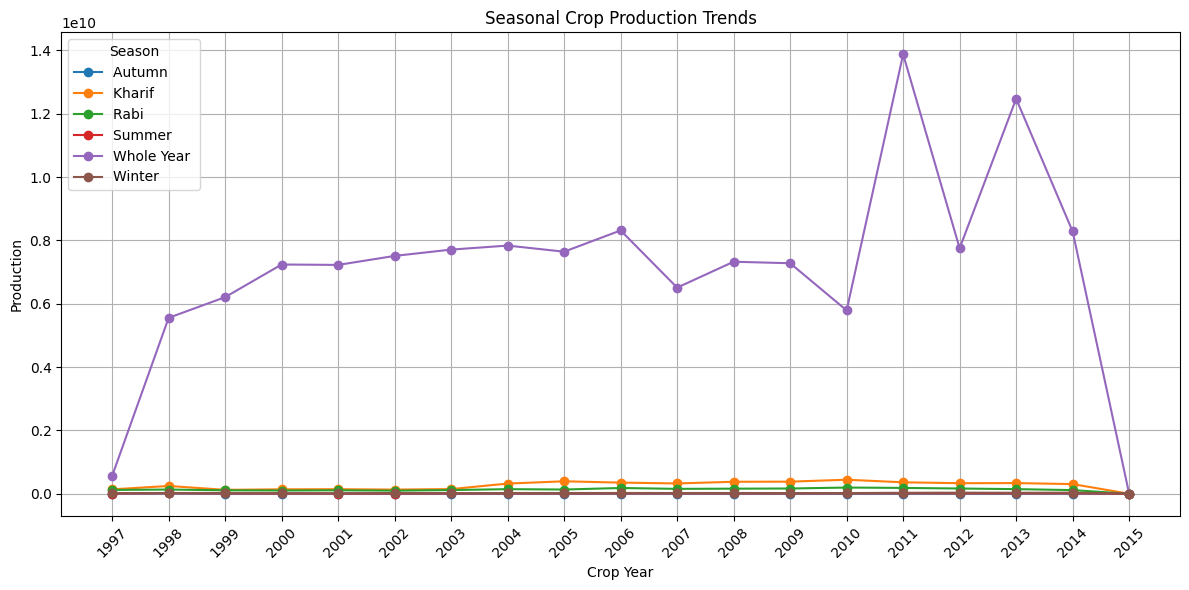

In [14]:
## Seasonal Crop Production Trends Analysis.

# Group the data by season and crop year, and sum the production for each group
seasonal_data = data.groupby(['Season', 'Crop_Year'])['Production'].sum().reset_index()

# Pivot the data to have seasons as columns and crop years as rows
pivot_data = seasonal_data.pivot(index='Crop_Year', columns='Season', values='Production').fillna(0)

# Plot the seasonal production trends
pivot_data.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Seasonal Crop Production Trends')
plt.xlabel('Crop Year')
plt.ylabel('Production')
plt.xticks(pivot_data.index, rotation=45)
plt.legend(title='Season')
plt.grid(True)
plt.tight_layout()
plt.show()


This analysis provides insights into the overall production trends of crops, including those cultivated throughout the year. You can observe the total production of crops across all seasons for each crop year. 

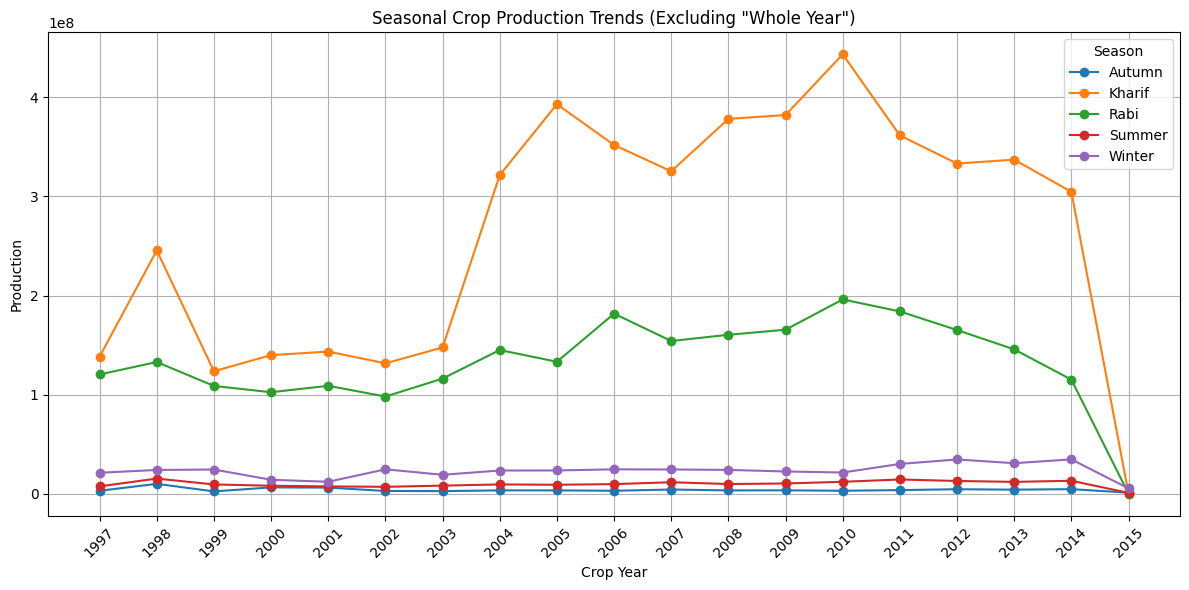

In [48]:
# Remove leading and trailing spaces from season labels
data['Season'] = data['Season'].str.strip()

# Filter out rows with "Whole Year" season
seasonal_data = data[~data['Season'].str.contains('Whole Year', case=False)]

# Group the filtered data by season and crop year, and sum the production for each group
seasonal_data = seasonal_data.groupby(['Season', 'Crop_Year'])['Production'].sum().reset_index()

# Pivot the data to have seasons as columns and crop years as rows
pivot_data = seasonal_data.pivot(index='Crop_Year', columns='Season', values='Production').fillna(0)

# Plot the seasonal production trends
pivot_data.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Seasonal Crop Production Trends (Excluding "Whole Year")')
plt.xlabel('Crop Year')
plt.ylabel('Production')
plt.xticks(pivot_data.index, rotation=45)
plt.legend(title='Season')
plt.grid(True)
plt.tight_layout()
plt.show()

Excluding the "Whole Year" season from the analysis enables a focused examination of the seasonal production trends of crops, particularly emphasizing the Kharif and Rabi seasons. These seasons typically exhibit higher production levels and notable fluctuations, making them pivotal in determining overall crop yields. Such insights aid in understanding the significant contributions of Kharif and Rabi seasons to overall crop output.

In [21]:
# Group the data by crop and calculate the total production for each crop
crop_production = data.groupby('Crop')['Production'].sum().reset_index()

# Select relevant features (production values)
X = crop_production[['Production']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

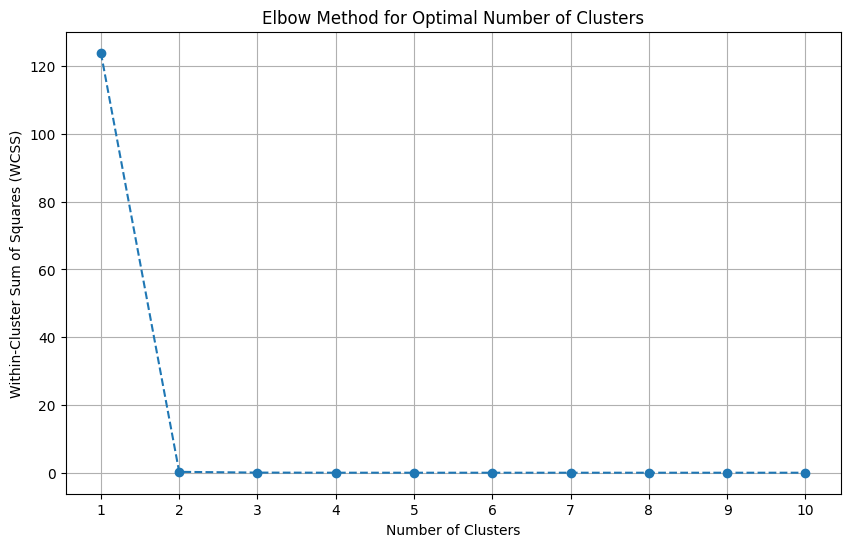

In [22]:
##    Crop Clustering Analysis (K-means)

# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow curve to visualize the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()



In [26]:
# Based on the Elbow curve, choose the optimal number of clusters and fit the K-means model
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the crop_production dataframe
crop_production['Cluster'] = kmeans.labels_



C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
# Group crops by cluster
clustered_crops = crop_production.groupby('Cluster')['Crop'].unique()

# Print crops in each cluster
for cluster, crops in clustered_crops.items():
    print(f"Cluster {cluster}: {', '.join(crops)}")

    

Cluster 0: Apple, Arcanut (Processed), Arecanut, Arhar/Tur, Ash Gourd, Atcanut (Raw), Bajra, Banana, Barley, Bean, Beans & Mutter(Vegetable), Beet Root, Ber, Bhindi, Bitter Gourd, Black pepper, Blackgram, Bottle Gourd, Brinjal, Cabbage, Cardamom, Carrot, Cashewnut, Cashewnut Processed, Cashewnut Raw, Castor seed, Cauliflower, Citrus Fruit, Coffee, Colocosia, Cond-spcs other, Coriander, Cotton(lint), Cowpea(Lobia), Cucumber, Drum Stick, Dry chillies, Dry ginger, Garlic, Ginger, Gram, Grapes, Groundnut, Guar seed, Horse-gram, Jack Fruit, Jobster, Jowar, Jute, Jute & mesta, Kapas, Khesari, Korra, Lab-Lab, Lemon, Lentil, Linseed, Litchi, Maize, Mango, Masoor, Mesta, Moong(Green Gram), Moth, Niger seed, Oilseeds total, Onion, Orange, Other  Rabi pulses, Other Cereals & Millets, Other Citrus Fruit, Other Dry Fruit, Other Fresh Fruits, Other Kharif pulses, Other Vegetables, Paddy, Papaya, Peach, Pear, Peas  (vegetable), Peas & beans (Pulses), Perilla, Pineapple, Plums, Pome Fruit, Pome Granet

Understanding crop clusters can inform agricultural planning, resource allocation, and decision-making. 
Cluster 0 encompasses a diverse array of crops ranging from fruits like Apple, Mango, and Orange to various vegetables, pulses, and cereals such as Bhindi, Gram, and Rice. This cluster represents a broad spectrum of agricultural products cultivated across different regions and seasons, reflecting the rich diversity of crop cultivation practices. In contrast, Cluster 1 predominantly comprises Coconut, suggesting a distinct focus or specialization in coconut cultivation within the dataset, possibly indicating regional or climatic preferences for coconut farming.

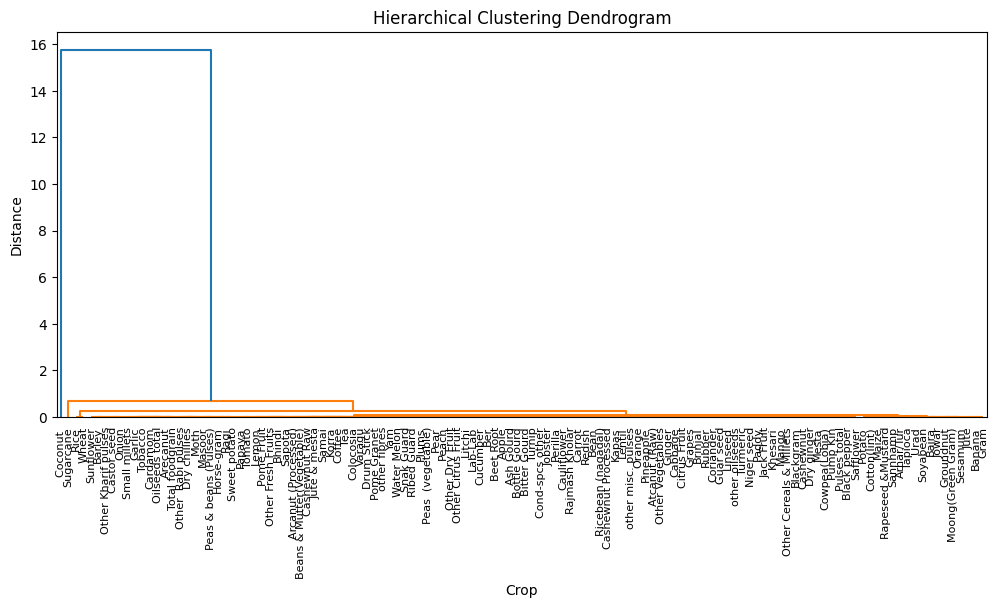

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage


# Group the data by crop and calculate the total production for each crop
crop_production = data.groupby('Crop')['Production'].sum().reset_index()

# Select relevant features (production values)
X = crop_production[['Production']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
Z = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 5))
dendrogram(Z, leaf_rotation=90., leaf_font_size=8., labels=crop_production['Crop'].values)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Crop')
plt.ylabel('Distance')
plt.show()


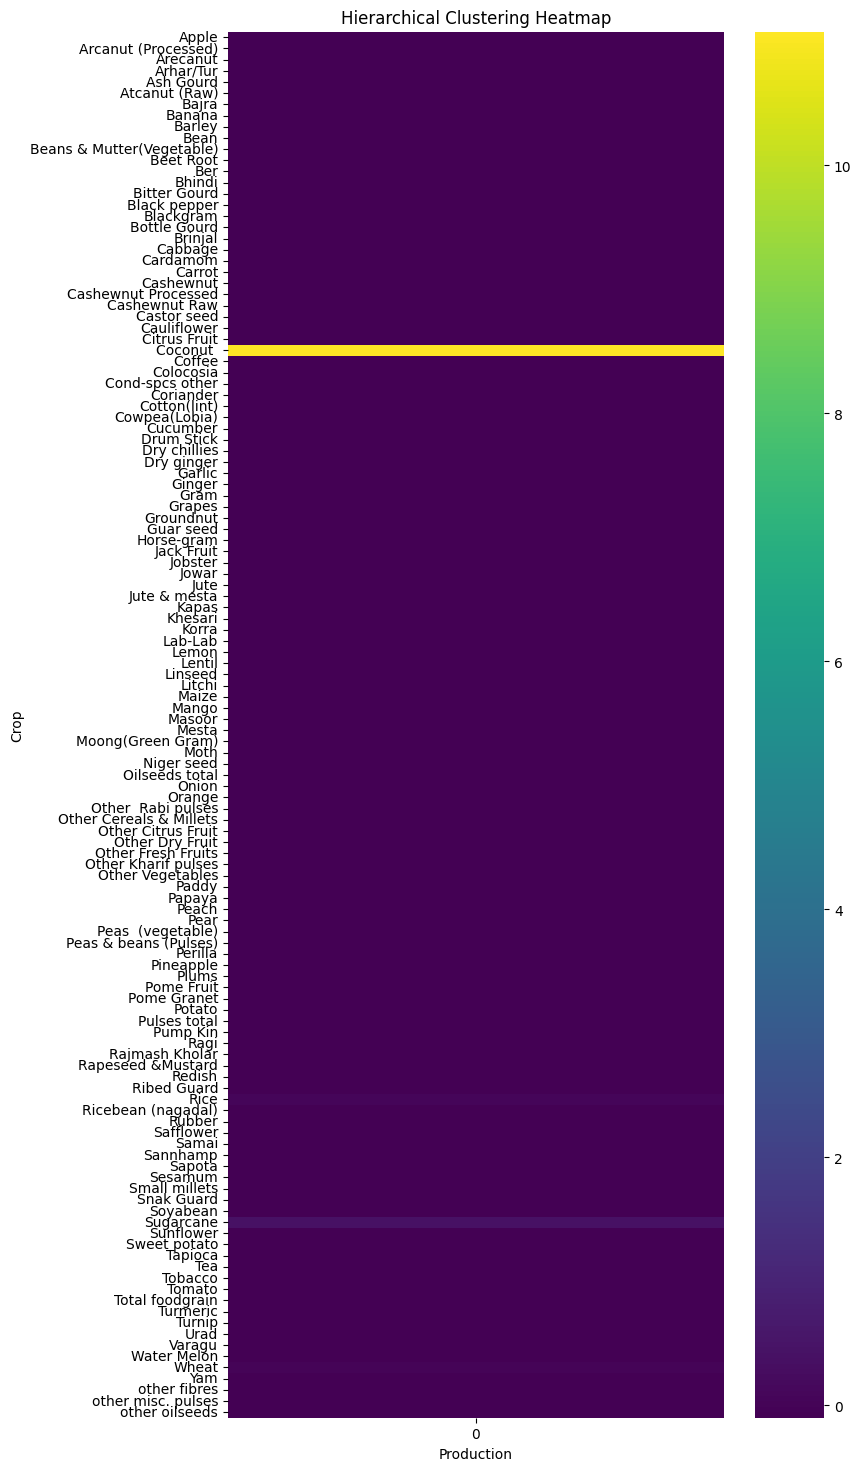

In [31]:
import seaborn as sns

# Plot the heatmap
plt.figure(figsize=(8, 18))
sns.heatmap(X_scaled, cmap='viridis', yticklabels=crop_production['Crop'].values)
plt.title('Hierarchical Clustering Heatmap')
plt.xlabel('Production')
plt.ylabel('Crop')
plt.show()


In [20]:
# Remove leading and trailing spaces from crop names
data['Crop'] = data['Crop'].str.strip()

# Dataframe with Coconut crop
coconut_df = data[data['Crop'] == 'Coconut']

# Dataframe without Coconut crop
non_coconut_df = data[data['Crop'] != 'Coconut']


In [21]:
print("Coconut Dataframe:")
print(coconut_df.head())

print("\nNon-Coconut Dataframe:")
print(non_coconut_df.head())


Coconut Dataframe:
                     State_Name District_Name  Crop_Year       Season  \
5   Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
14  Andaman and Nicobar Islands      NICOBARS       2001  Whole Year    
23  Andaman and Nicobar Islands      NICOBARS       2002  Whole Year    
32  Andaman and Nicobar Islands      NICOBARS       2003  Whole Year    
41  Andaman and Nicobar Islands      NICOBARS       2004  Whole Year    

       Crop      Area  Production  
5   Coconut  18168.00  65100000.0  
14  Coconut  18190.00  64430000.0  
23  Coconut  18240.00  67490000.0  
32  Coconut  18284.74  68580000.0  
41  Coconut  18394.70  52380000.0  

Non-Coconut Dataframe:
                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and

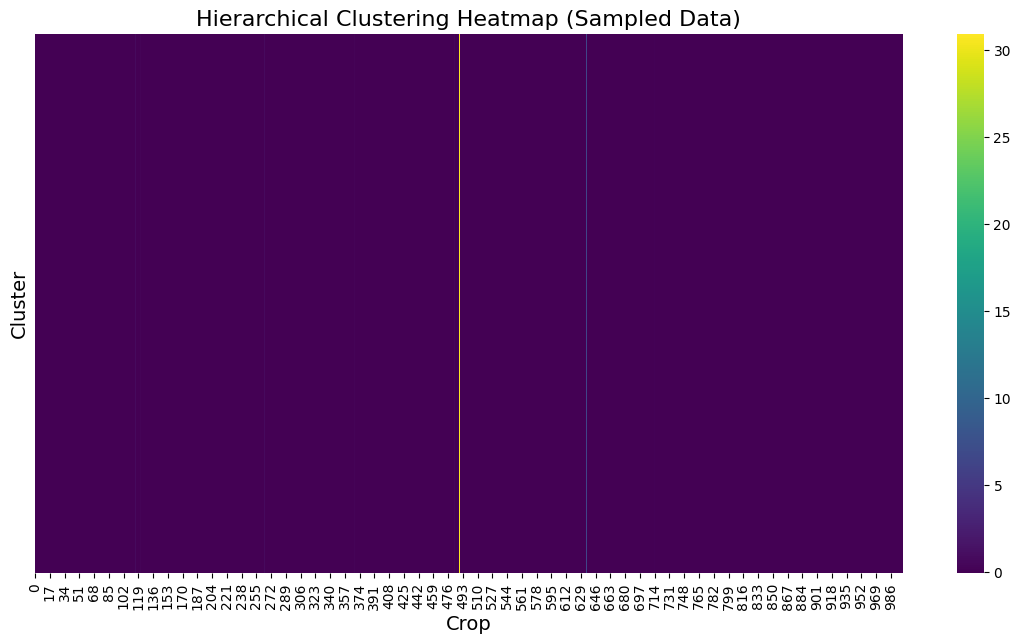

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

# Remove leading and trailing spaces from crop names
data['Crop'] = data['Crop'].str.strip()

# Sample the dataset
sampled_data = data.sample(n=1000, random_state=42)

# Select relevant features (production values)
X = sampled_data[['Production']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform hierarchical clustering
Z = linkage(X_scaled, method='ward')

# Plot the heatmap
plt.figure(figsize=(14, 7))
sns.heatmap(X_scaled.T, cmap='viridis', yticklabels=False)
plt.title('Hierarchical Clustering Heatmap (Sampled Data)', fontsize=16)
plt.xlabel('Crop', fontsize=14)
plt.ylabel('Cluster', fontsize=14)
plt.show()

In [41]:
# Select relevant features (production values)
X = non_coconut_df[['Production']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize and fit K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)


C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rahi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\

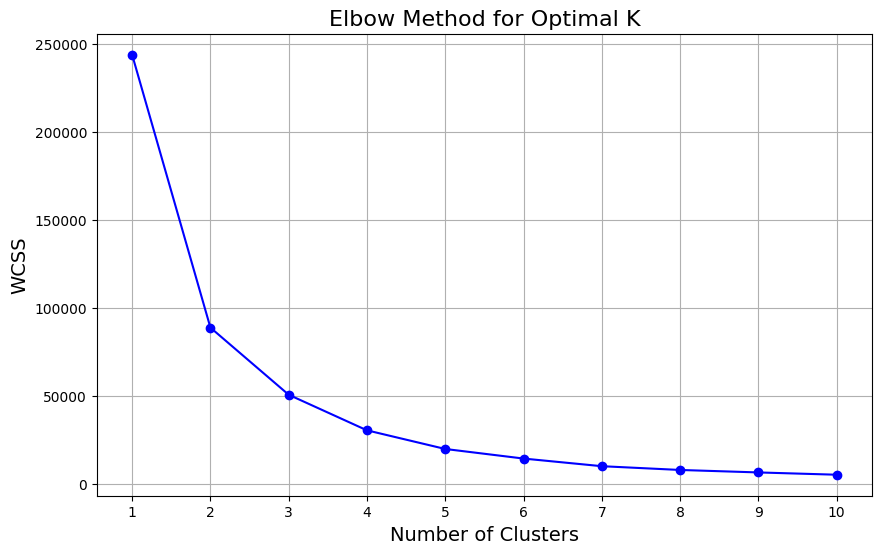

In [40]:
# Calculate within-cluster sum of squares (WCSS) for different values of k
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS', fontsize=14)
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [43]:
# Assign cluster labels
non_coconut_df['Cluster'] = kmeans.labels_

# Group data by cluster and calculate summary statistics
cluster_summary = non_coconut_df.groupby('Cluster')['Production'].describe()

# Display cluster summary
print("Cluster 0:")
print(cluster_summary.loc[0])
print("\nCluster 1:")
print(cluster_summary.loc[1])


Cluster 0:
count    2.438290e+05
mean     4.385782e+04
std      1.955067e+05
min      0.000000e+00
25%      8.900000e+01
50%      7.550000e+02
75%      7.540000e+03
max      4.812200e+06
Name: 0, dtype: float64

Cluster 1:
count    2.770000e+02
mean     9.594543e+06
std      4.305833e+06
min      4.829160e+06
25%      6.304500e+06
50%      8.432610e+06
75%      1.206066e+07
max      3.715800e+07
Name: 1, dtype: float64


C:\Users\Rahi\AppData\Local\Temp\ipykernel_12780\1388842578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_coconut_df['Cluster'] = kmeans.labels_


In [45]:
# Filter data points in each cluster
cluster_0_data = non_coconut_df[non_coconut_df['Cluster'] == 0]
cluster_1_data = non_coconut_df[non_coconut_df['Cluster'] == 1]

# Get unique crop names in each cluster
cluster_0_crops = cluster_0_data['Crop'].unique()
cluster_1_crops = cluster_1_data['Crop'].unique()

# Print crops in each cluster
print("Crops in Cluster 0:")
print(cluster_0_crops)

print("\nCrops in Cluster 1:")
print(cluster_1_crops)


Crops in Cluster 0:
['Arecanut' 'Other Kharif pulses' 'Rice' 'Banana' 'Cashewnut' 'Dry ginger'
 'Sugarcane' 'Sweet potato' 'Tapioca' 'Black pepper' 'Dry chillies'
 'other oilseeds' 'Turmeric' 'Maize' 'Moong(Green Gram)' 'Urad'
 'Arhar/Tur' 'Groundnut' 'Sunflower' 'Bajra' 'Castor seed' 'Cotton(lint)'
 'Horse-gram' 'Jowar' 'Korra' 'Ragi' 'Tobacco' 'Gram' 'Wheat' 'Masoor'
 'Sesamum' 'Linseed' 'Safflower' 'Onion' 'other misc. pulses' 'Samai'
 'Small millets' 'Coriander' 'Potato' 'Other  Rabi pulses' 'Soyabean'
 'Beans & Mutter(Vegetable)' 'Bhindi' 'Brinjal' 'Citrus Fruit' 'Cucumber'
 'Grapes' 'Mango' 'Orange' 'other fibres' 'Other Fresh Fruits'
 'Other Vegetables' 'Papaya' 'Pome Fruit' 'Tomato' 'Rapeseed &Mustard'
 'Mesta' 'Cowpea(Lobia)' 'Lemon' 'Pome Granet' 'Sapota' 'Cabbage'
 'Peas  (vegetable)' 'Niger seed' 'Bottle Gourd' 'Sannhamp' 'Varagu'
 'Garlic' 'Ginger' 'Oilseeds total' 'Pulses total' 'Jute'
 'Peas & beans (Pulses)' 'Blackgram' 'Paddy' 'Pineapple' 'Barley'
 'Khesari' 'Guar seed

we have now removed the coconut crop from the dataset analysed.
we see a very different kind of clusters, although one cluster is still a mix of broad spectrum of crops.

Cluster 0: A wide mix of crops like fruits, vegetables, cereals, and spices are grown here, showing a diverse farming landscape with many different types of crops.

Cluster 1: This cluster focuses mainly on Sugarcane and Oilseeds total, indicating a specialized farming area with a strong emphasis on cash crops and oilseed production.